# Aula 7 - Exercícios - Storytelling e Correlação
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib
import re

### 7.1 Escreva uma função para encontrar numa string todos os grupos de letras em que uma letra a é seguida de 3 letras b. 


In [2]:
def a3b(s):
    ### BEGIN SOLUTION
    return re.findall('ab{3}',  s)
    ### END SOLUTION

In [3]:
## Faça seus testes aqui


In [4]:
# Validação
assert a3b('abbb asde ababbaaabbbabbb') == ['abbb', 'abbb', 'abbb']

### 7.2 Escreva uma função para retornar os números presentes ao final de uma string. 
#### Retorne uma lista contendo o número no formato string ou uma lista vazia se os ultimos caracteres não forem dígitos.


In [5]:
def get_final_numbers(s):
    """retorne uma lista contendo o número no formato string ou 
       uma lista vazia se os ultimos caracteres não forem dígitos.
    """
    ### BEGIN SOLUTION
    pat = '[0-9]+$'
    return re.findall(pat, s)
    ### END SOLUTION

In [6]:
## Faça seus testes aqui


In [7]:
# Validação
assert get_final_numbers('33a307a') == []
assert get_final_numbers('33a307') == ['307']

### 7.3 Reescreva em português todos os textos que aparecem no gráfico a seguir:
https://github.com/alexlopespereira/curso_ciencia_dados2021/blob/master/exercicios/7.3.png
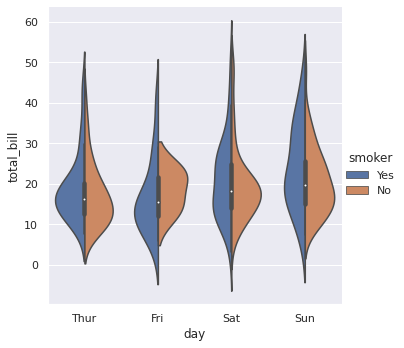
#### Dica: Essa pergunta no stackoverflow pode te ajudar a resolver uma parte desta questão: https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot

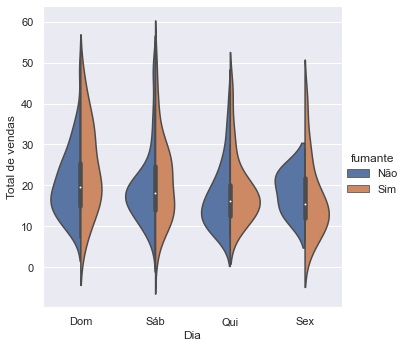

In [8]:
# Resolva aqui o exercício
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor
tips = sns.load_dataset("tips")# alterando o nome da coluna smoker diretamente no dataframe

tips.rename(columns={'smoker':'fumante'}, inplace=True)# alterando o valor yes e no

tips['fumante'] = tips['fumante'].replace({'Yes': 'Sim', 'No': 'Não'})# alterando dias da semana

tips['day'] = tips['day'].replace({'Sun':'Dom', 'Thur':'Qui', 'Fri':'Sex', 'Sat':'Sáb'})
tips
ax = sns.catplot(x="day", y="total_bill", hue="fumante",
            kind="violin", split=True, data=tips);# Alterando os lables dos eixos x e y
# # https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
ax.set(xlabel='Dia', ylabel="Total de vendas") 

### 7.4 Plote um gráfico igual ao do modelo. Considere como dado de entrada os dois DataFrames definidos a seguir.
#### Dica 1: use o seguinte trecho de código para retornar o objeto Axes da figura
#### fig, ax1 = plt.subplots(figsize=(12,6))
#### Dica 2: Plote o dado do dataframe d1 passando esse objeto Axes (eixo) como argumento. Os métodos de plot do seaborn aceitam o argumento ax, use-o passando o objeto Axes.
#### Dica 3: use o método matplotlib.pyplot.twinx() para gerar um segundo objeto Axes a partir do primeiro.
#### Exemplo: ax2 = ax1.twinx()
#### Dica 4:  Plote o dado do dataframe d2 usando o novo objeto Axes (Exemplo: ax2)
#### Dica 5: A cor usada no gráfico de barras foi color="salmon"
https://github.com/alexlopespereira/curso_ciencia_dados2021/blob/master/exercicios/7.4.png
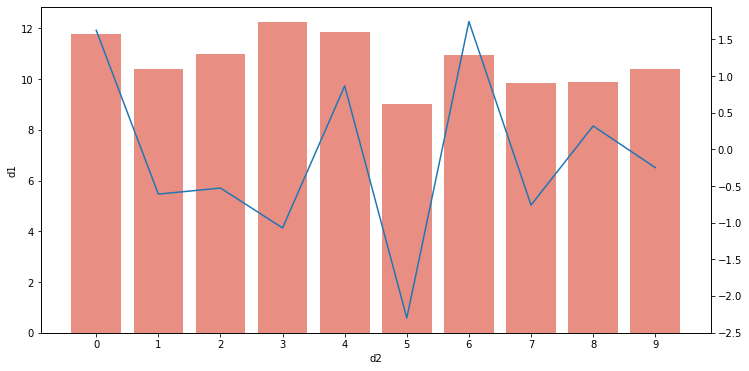

#### Plote as seguintes séries no gráfico
```python
np.random.seed(0)
df1 = pd.DataFrame(data={'d1':10+np.random.normal(0,1,size=10), 'd2': range(10)})
np.random.seed(1)
df2 = pd.DataFrame(data={'d1':np.random.normal(0,1,size=10)})
```

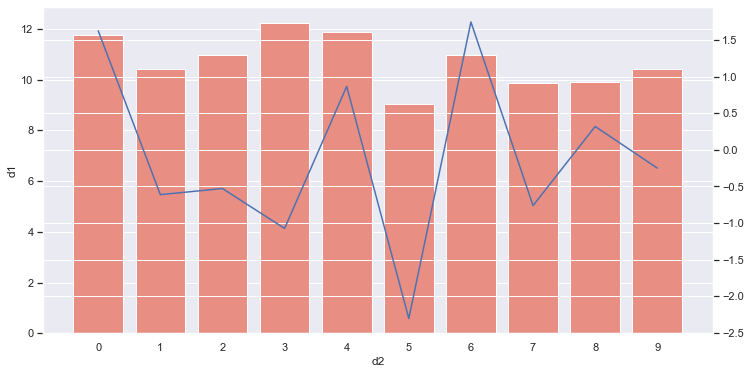

In [9]:
# Resolva aqui o exercício
# sns.set()
np.random.seed(0)
df1 = pd.DataFrame(data={'d1':10+np.random.normal(0,1,size=10), 'd2': range(10)})
np.random.seed(1)
df2 = pd.DataFrame(data={'d1':np.random.normal(0,1,size=10)})
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data = df1, x='d2', y='d1', ax=ax1, color="salmon")
ax2 = ax1.twinx()
sns.lineplot(data = df2['d1'], ax=ax2)

### 7.5 Plote o heatmap da correlação das variáveis do dataframe formado pelo merge do dataset do IDEB com o dataset de gini.
#### Plote o heatmap com anotações.
#### Colete o valor do IDEB de 2017 da coluna IDEB12_17 da tabela do IDEB abaixo. O pandas lê essa coluna com o nome IDEB12_17.
#### Faça o filtro da Rede por Pública.
#### Dica: Construa uma coluna com o código do ibge do município (de 6 caracteres) e faça um slice das colunas do dataframe do IDEB de modo a selecionar apenas as colunas mostradas a seguir:

|    |   cod_ibge6 | NO_MUNICIPIO          |   IDEB12_17 |
|---:|------------:|:----------------------|------------:|
|  1 |      110001 | Alta Floresta D'Oeste |         3.9 |
|  2 |      110002 | Ariquemes             |         3.8 |
|  5 |      110003 | Cabixi                |         3.7 |
|  7 |      110004 | Cacoal                |         3.9 |
|  9 |      110005 | Cerejeiras            |         3.8 |


In [10]:
# Plote seu gráfico aqui

path_ideb = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/ideb/ideb_municipios2017.xlsx'
path_gini = 'https://github.com/alexlopespereira/curso_ciencia_dados2021/raw/master/data/originais/gini/ginibr.csv'
df_ideb = pd.read_excel(path_ideb,  skiprows = 9, skipfooter = 3, na_values = ["...","-"], dtype={'COD_MUN': str})
df_ideb["COD_MUN"] = df_ideb["COD_MUN"].str[:-1]
df_ideb.rename(columns = {"COD_MUN": "cod_ibge6"}, inplace=True)
df_ideb_r = df_ideb[df_ideb["REDE"] == "Pública"]
df_ideb_r = df_ideb_r[["cod_ibge6", "NO_MUNICIPIO","IDEB12_17"]]
df_gini = pd.read_csv(path_gini, sep = ";", engine="python", skiprows = 2, skipfooter = 2, decimal = ",", na_values = "...", encoding="UTF8")
serie = df_gini["Município"].str[:6]
df_gini.insert(0,"cod_ibge6", serie)
df_gini["Município"]= df_gini["Município"].str[6:]
df_gini.rename(columns = {'Município': 'NO_MUNICIPIO',}, inplace = True)
df_gini = df_gini[["cod_ibge6","NO_MUNICIPIO","2010"]]
df_ig = pd.merge(df_gini, df_ideb_r, how = 'outer', on = "cod_ibge6")
df_ig

,cod_ibge6,NO_MUNICIPIO_x,2010,NO_MUNICIPIO_y,IDEB12_17
0,110001,Alta Floresta D'Oeste,0.5893,Alta Floresta D'Oeste,3.9
1,110037,Alto Alegre dos Parecis,0.5491,Alto Alegre dos Parecis,4.1
2,110040,Alto Paraíso,0.5417,Alto Paraíso,3.1
3,110034,Alvorada D'Oeste,0.5355,Alvorada D'Oeste,3.8
4,110002,Ariquemes,0.5496,Ariquemes,3.8
...,...,...,...,...,...
5563,522230,Vila Propício,0.5240,Vila Propício,4.5
5564,530010,Brasília,0.6370,Brasília,3.4
5565,150475,NaN,NaN,Mojuí dos Campos,3.0
5566,431454,NaN,NaN,Pinto Bandeira,3.5


In [11]:
df_ig.corr()

,2010,IDEB12_17
2010,1.000000,-0.298009
IDEB12_17,-0.298009,1.000000


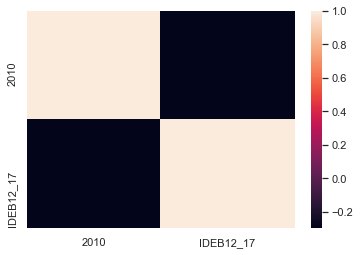

In [12]:
sns.set()
sns.heatmap(df_ig.corr())